In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
import omnipath as op
import pandas as pd

/home/eirini/anaconda3/envs/omniflow_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CPU times: user 1.61 s, sys: 336 ms, total: 1.94 s
Wall time: 1.88 s


In [2]:
kinase_int = pd.read_csv("/home/eirini/Documents/Git/neko/Kinase_Substrate_Dataset", sep = "\t")
phospho_effect = pd.read_csv("/home/eirini/Documents/Git/neko/Regulatory_sites", sep = "\t")

In [3]:
kinase_int.head()

,GENE,KINASE,KIN_ACC_ID,KIN_ORGANISM,SUBSTRATE,SUB_GENE_ID,SUB_ACC_ID,SUB_GENE,SUB_ORGANISM,SUB_MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,DOMAIN,IN_VIVO_RXN,IN_VITRO_RXN,CST_CAT#
0,Dyrk2,DYRK2,Q5U4C9,mouse,NDEL1,83431.0,Q9ERR1,Ndel1,mouse,S336,1869686801,LGSsRPSsAPGMLPL,NaN,,X,NaN
1,Pak2,PAK2,Q64303,rat,MEK1,170851.0,Q01986,Map2k1,rat,S298,448284,RtPGRPLsSYGMDSR,Pkinase,,X,9128; 98195
2,Pak2,PAK2,Q64303,rat,PRKD1,85421.0,Q9WTQ1,Prkd1,rat,S203,449896,GVRRRRLsNVsLTGL,NaN,X,,NaN
3,Pak2,PAK2,Q64303,rat,prolactin,24683.0,P01237,Prl,rat,S206,451732,IRCLRRDsHKVDNYL,Hormone_1,,X,NaN
4,Pak2,PAK2,Q64303,rat,prolactin,5617.0,P01236,PRL,human,S207,451732,LHCLRRDsHKIDNYL,Hormone_1,,X,NaN


In [4]:
phospho_effect.head()

,GENE,PROTEIN,PROT_TYPE,ACC_ID,GENE_ID,HU_CHR_LOC,ORGANISM,MOD_RSD,SITE_GRP_ID,SITE_+/-7_AA,...,ON_FUNCTION,ON_PROCESS,ON_PROT_INTERACT,ON_OTHER_INTERACT,PMIDs,LT_LIT,MS_LIT,MS_CST,NOTES,Unnamed: 20
0,AQP2,AQP2,"Channel, misc.; Membrane protein, integral; Me...",P41181,359.0,12q13.12,human,K270-ub,999601,QSLPRGTkA______,...,protein degradation; intracellular localizatio...,NaN,NaN,NaN,19357255; 21209006,6,0,0,LIP5 binding to AQP2 is independent of AQP2 ub...,NaN
1,Pdpk1,PDK1,"EC 2.7.11.1; KINASE; Kinase, protein; Nuclear ...",O55173,81745.0,10q12,rat,Y379-p,447695,DEDCYGNyDNLLSQF,...,"enzymatic activity, induced","translation, altered; cell adhesion, altered",NaN,NaN,18559349,8,1,0,Induces fibronectin expression and deposition ...,NaN
2,CD200R1,CD200R,"Membrane protein, integral; Receptor, misc.",Q8TD46,131450.0,3q13.2,human,Y325-p,458379,TEKNNPLyDTTNKVK,...,"molecular association, regulation",NaN,DOK2(INDUCES),NaN,19786546,2,2,11,recruitment of RasGAP by Dok2,NaN
3,Gsk3b,GSK3B,"EC 2.7.11.1; EC 2.7.11.26; KINASE; Kinase, pro...",P18266,84027.0,11q21,rat,S9-p,449111,SGRPRTTsFAESCKP,...,"protein stabilization; molecular association, ...","cell cycle regulation; apoptosis, altered; cel...",14-3-3 beta(INDUCES),NaN,11018058; 11094086; 11533051; 15073173; 172006...,570,46,227,NaN,NaN
4,Sik2,QIK,"EC 2.7.11.1; KINASE; Kinase, protein; Protein ...",Q3LRT3,315649.0,8q23,rat,T484-p,478056,RSGQRRHtLSEVTNQ,...,protein degradation,NaN,NaN,NaN,21220102,3,10,85,NaN,NaN


In [15]:
resources = Resources()
interactions = resources.process_interactions(kinase_int, phospho_effect, expand=True)
resources.add_database(interactions)

/home/eirini/Documents/Git/neko/neko/_inputs/resources.py:114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kinase_int_filtered['target'] = kinase_int_filtered['SUB_GENE'] + '_' + kinase_int_filtered['SUB_MOD_RSD']
/home/eirini/Documents/Git/neko/neko/_inputs/resources.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phospho_effect_filtered['MOD_RSD'] = phospho_effect_filtered['MOD_RSD'].apply(lambda x: x[:-2] if x.endswith('-p') else x)
/home/eirini/Documents/Git/neko/neko/_inputs/resources.py:133: S

### First we define a set of node we are interested in

In [27]:
genes = ['SMAD3_S423', 'SMAD3_S425', 'TP53_S15', 'AKT1S1_T246', 'GSK3B_S9', 'GSK3B_S21', 'AKT1_S473', 'HSPB1_S78', 'HSPB1_S82', 'MAPK14_T180', 'MAPK14_Y182', 'MAP2K1_S218', 'MAP2K1_S222', 'RPS6KA1_S380', 'CREB1_S133', 'NFKBIA_S32', 'NFKBIA_S36', 'MTOR_S2448', 'JUN_S63', 'EGFR_Y1068', 'MAPK3_T202', 'MAPK3_Y204', 'PTPN11_Y542', 'STAT3_Y705', 'CHEK2_T68', 'RELA_S536', 'MARCKS_S170','SMAD3', 'TP53', 'AKT1S1', 'GSK3B', 'AKT1', 'HSPB1', 'MAPK14', 'MAP2K1', 'RPS6KA1', 'CREB1', 'NFKBIA', 'MTOR', 'JUN', 'EGFR', 'MAPK3', 'PTPN11', 'STAT3', 'CHEK2', 'RELA', 'MARCKS']
genes = ['SMAD3_S423', 'SMAD3_S425', 'TP53_S15', 'AKT1S1_T246', 'GSK3B_S9', 'GSK3B_S21', 'AKT1_S473', 'HSPB1_S78', 'HSPB1_S82', 'MAPK14_T180', 'MAPK14_Y182', 'MAP2K1_S218', 'MAP2K1_S222', 'RPS6KA1_S380', 'CREB1_S133', 'NFKBIA_S32', 'NFKBIA_S36', 'MTOR_S2448', 'JUN_S63', 'EGFR_Y1068', 'MAPK3_T202', 'MAPK3_Y204', 'PTPN11_Y542', 'STAT3_Y705', 'CHEK2_T68', 'RELA_S536', 'MARCKS_S170']

#genes = ['SMAD3_S423', 'SMAD3_S425', 'TP53_S15', 'AKT1S1_T246', 'GSK3B_S9', 'GSK3B_S21', 'AKT1_S473', 'HSPB1_S78']

In [2]:
resources = Resources()
#resources.import_signor_tsv("./all_data_18_03_24.tsv")

In [28]:
%%time
new_net1 = Network(genes, resources=resources.interactions)

CPU times: user 84.5 ms, sys: 110 µs, total: 84.6 ms
Wall time: 81 ms


In [29]:
%%time
new_net1.connect_nodes(only_signed=True)

CPU times: user 1.64 s, sys: 3.85 ms, total: 1.64 s
Wall time: 1.63 s


In [30]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

In [31]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=10, k_mean="extensive", only_signed=True, connect_node_when_first_introduced=True)

looking for paths in the network with length:  0  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  1  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  2  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  3  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  4  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  5  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  6  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  7  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  8  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  9  for node  SMAD3_S423  and  SMAD3_S425
looking for paths in the network with length:  10  for node  SMAD3_S423  and  SMAD3_S425
i_search =  4
Looking for paths

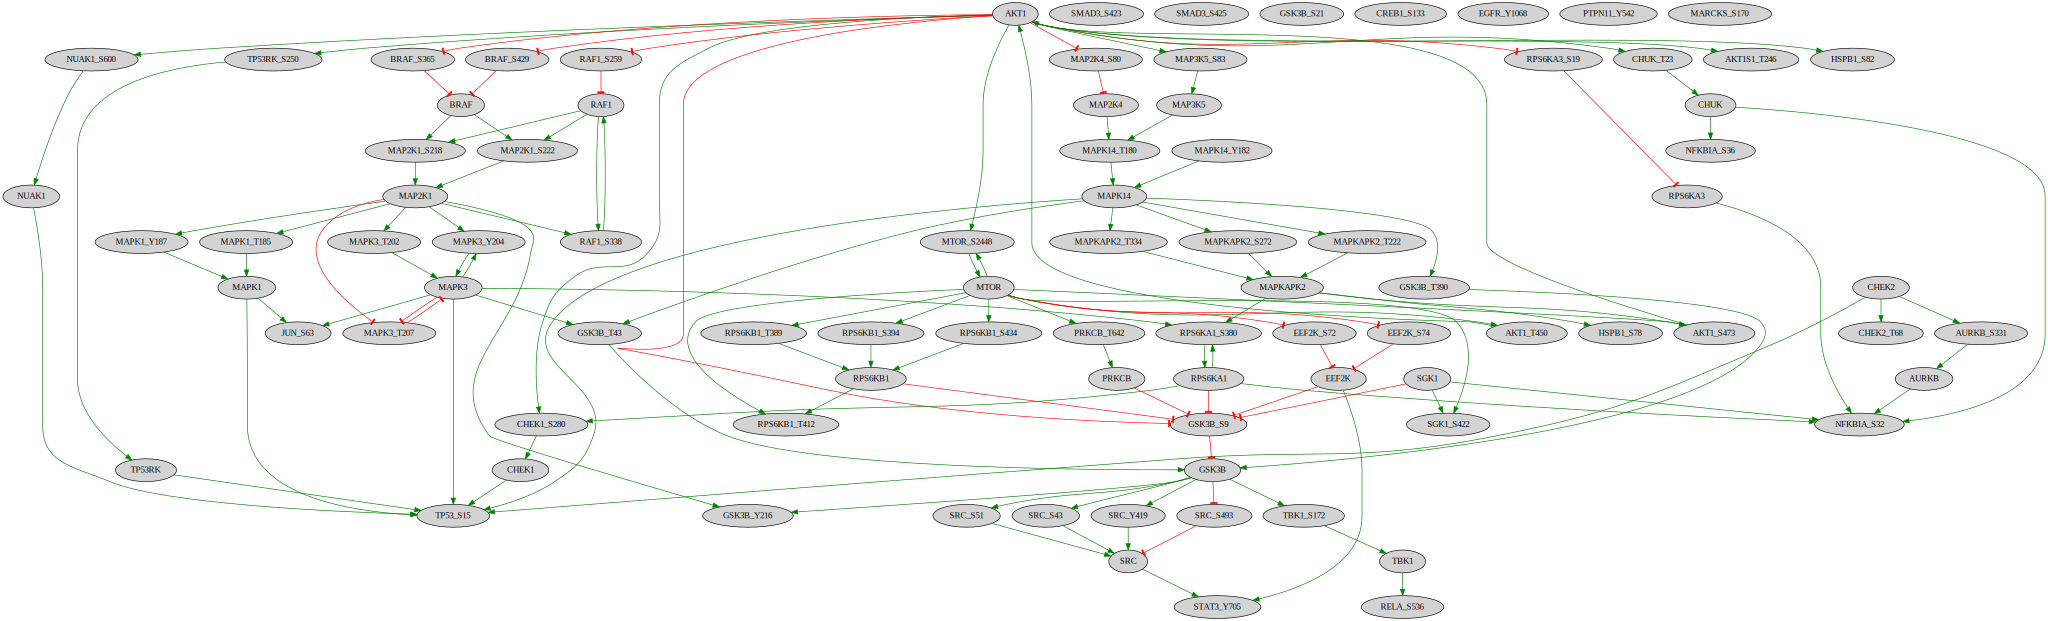

In [33]:
visualizer1 = NetworkVisualizer(new_net1, color_by='effect')
visualizer1.render(output_file='inp_prot_sites')

### If the all_interaction database of omnipath is not sufficient, we can change it or extend it. To do it, we can use the Resources object:

In [32]:
interactions = op.interactions.AllInteractions.get() #first we get the interactions from omnipath

In [34]:
interactions[interactions.sources.isin(["SIGNOR"])]

,source,target,is_directed,is_stimulation,is_inhibition,consensus_direction,consensus_stimulation,consensus_inhibition,curation_effort,references,sources,type,n_sources,n_primary_sources,n_references,references_stripped
986,P23458,COMPLEX:P15260_P38484,True,True,False,False,False,False,1,SIGNOR:19041276,SIGNOR,post_translational,1,1,1,19041276
993,O60674,COMPLEX:P15260_P38484,True,True,False,False,False,False,1,SIGNOR:23898330,SIGNOR,post_translational,1,1,1,23898330
1006,P53355,P46821,True,True,False,False,False,False,1,SIGNOR:18806760,SIGNOR,post_translational,1,1,1,18806760
2639,P14618,COMPLEX:P27540_Q16665,True,True,False,False,False,False,1,SIGNOR:21620138,SIGNOR,post_translational,1,1,1,21620138
3048,A8MT69,Q8IYD8,True,True,False,False,False,False,1,SIGNOR:20347429,SIGNOR,post_translational,1,1,1,20347429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273958,443872,P08235,True,False,True,True,False,True,1,SIGNOR:18038968,SIGNOR,small_molecule_protein,1,1,1,18038968
273959,5073,P28223,True,False,True,True,False,True,1,SIGNOR:8935801,SIGNOR,small_molecule_protein,1,1,1,8935801
273960,5736,P08908,True,False,True,True,False,True,1,SIGNOR:8935801,SIGNOR,small_molecule_protein,1,1,1,8935801
273962,3396,P28223,True,False,True,True,False,True,1,SIGNOR:8935801,SIGNOR,small_molecule_protein,1,1,1,8935801


### Then, we can add allInteractions in the Resources object

In [5]:
resources = Resources()
resources.add_database(interactions)

NameError: name 'interactions' is not defined

In [4]:
resources.interactions

,source,target,is_directed,consensus_direction,consensus_stimulation,consensus_inhibition,is_stimulation,is_inhibition
0,EIF2AK1,EIF2S1_S52,True,False,False,False,1,1
2,PRKCD,HDAC5_S259,True,False,False,False,1,1
3,PRKCD,PTPRA_S204,True,False,False,False,1,0
4,PRKCD,BCL2_S70,True,False,False,False,0,1
6,PRKCD,SLC9A1_S648,True,False,False,False,0,1
...,...,...,...,...,...,...,...,...
14483,NUAK1,CASP6_S257,True,False,False,False,0,1
14484,NUAK1,TP53_S392,True,False,False,False,1,0
14489,NUAK1,TP53_S15,True,False,False,False,1,1
14491,ULK2,STING1_S366,True,False,False,False,1,0


### Now we can explore another database we are interested in, for example, the ligand receptor one

In [27]:
extra = op.interactions.LigRecExtra.get()

### And then we add it to the Resources object

In [33]:
resources.add_database(extra, reset_index=True)

### Now we create the network with a similar list of genes but specifying the Resource object

In [34]:
genes = ["SRC", "NOTCH1", "PTK2", "CDH1", "CDH2", "VIM", "MAP4K4", "PTK2B", "COL1A1"]

In [35]:
%%time
new_net1 = Network(genes, resources=resources)

CPU times: user 27.1 ms, sys: 0 ns, total: 27.1 ms
Wall time: 26.5 ms


In [15]:
%%time
new_net1.connect_nodes(only_signed=True, consensus_only=True)

P12931 Q05397
P12830 P12931
P12931 P19022
P12931 Q14289
P02452 P12931
P46531 P19022
P46531 P02452
Q14289 Q05397
CPU times: user 1.19 s, sys: 4.05 ms, total: 1.2 s
Wall time: 1.2 s


In [16]:
%%time
new_net1.complete_connection(mode="ALL", maxlen=3, k_mean="tight", only_signed=True,
                            consensus=True, connect_node_when_first_introduced=True)

looking for paths in the network with length:  0  for node  SRC  and  NOTCH1
looking for paths in the network with length:  1  for node  SRC  and  NOTCH1
looking for paths in the network with length:  2  for node  SRC  and  NOTCH1
Found a path!
[['SRC', 'COL1A1', 'NOTCH1'], ['SRC', 'CDH2', 'NOTCH1']]
looking for paths in the network with length:  0  for node  SRC  and  PTK2
looking for paths in the network with length:  1  for node  SRC  and  PTK2
Found a path!
[['SRC', 'PTK2']]
looking for paths in the network with length:  0  for node  SRC  and  CDH1
looking for paths in the network with length:  1  for node  SRC  and  CDH1
Found a path!
[['SRC', 'CDH1']]
looking for paths in the network with length:  0  for node  SRC  and  CDH2
looking for paths in the network with length:  1  for node  SRC  and  CDH2
Found a path!
[['SRC', 'CDH2']]
looking for paths in the network with length:  0  for node  SRC  and  VIM
looking for paths in the network with length:  1  for node  SRC  and  VIM
look

COMPLEX:Q04864 P19022
COMPLEX:P05412_P17535 P19022
COMPLEX:P01100_P05412 P19022
COMPLEX:P17275 P19022
COMPLEX:P05412_P15407 P19022
COMPLEX:P05412 P19022
COMPLEX:P01100_P17535 P19022
COMPLEX:Q04206_Q04864 P19022
COMPLEX:Q01201_Q04864 P19022
COMPLEX:Q00653 P19022
COMPLEX:Q00653_Q04864 P19022
COMPLEX:Q01201_Q04206 P19022
COMPLEX:P05412_P15408 P19022
COMPLEX:P17275_P17535 P19022
COMPLEX:P05412_P53539 P08670
COMPLEX:P19838_Q04206 P08670
COMPLEX:P17535_P53539 P08670
Q8WYK2 P08670
P19838 P08670
Q9NQB0 P08670
COMPLEX:Q01201 P08670
COMPLEX:P15408_P17275 P08670
COMPLEX:P15407_P17535 P08670
P08047 P08670
COMPLEX:P01100_P17275 P08670
COMPLEX:P19838_Q04864 P08670
COMPLEX:Q04206 P08670
COMPLEX:P19838_Q01201 P08670
COMPLEX:P15407_P17275 P08670
COMPLEX:P05412_P17275 P08670
COMPLEX:P17535 P08670
Q02447 P08670
P42229 P08670
COMPLEX:Q00653_Q01201 P08670
COMPLEX:P17275_P53539 P08670
COMPLEX:P19838_Q00653 P08670
COMPLEX:P15408_P17535 P08670
COMPLEX:Q00653_Q04206 P08670
COMPLEX:P19838 P08670
COMPLEX:Q04864 

P54762 Q05397
COMPLEX:P05412_P53539 P12830
COMPLEX:P19838_Q04206 P12830
COMPLEX:P17535_P53539 P12830
COMPLEX:Q01201 P12830
COMPLEX:P15408_P17275 P12830
COMPLEX:P15407_P17535 P12830
COMPLEX:P01100_P17275 P12830
COMPLEX:P19838_Q04864 P12830
COMPLEX:Q04206 P12830
COMPLEX:P19838_Q01201 P12830
COMPLEX:P15407_P17275 P12830
COMPLEX:P05412_P17275 P12830
COMPLEX:P17535 P12830
COMPLEX:Q00653_Q01201 P12830
COMPLEX:P17275_P53539 P12830
COMPLEX:P19838_Q00653 P12830
COMPLEX:P15408_P17535 P12830
COMPLEX:Q00653_Q04206 P12830
COMPLEX:P19838 P12830
COMPLEX:Q04864 P12830
COMPLEX:P05412_P17535 P12830
COMPLEX:P01100_P05412 P12830
COMPLEX:P17275 P12830
COMPLEX:P05412_P15407 P12830
COMPLEX:P05412 P12830
COMPLEX:P01100_P17535 P12830
COMPLEX:Q04206_Q04864 P12830
COMPLEX:Q01201_Q04864 P12830
COMPLEX:Q00653 P12830
COMPLEX:Q00653_Q04864 P12830
COMPLEX:Q01201_Q04206 P12830
COMPLEX:P05412_P15408 P12830
COMPLEX:P17275_P17535 P12830
P37231 P12830
COMPLEX:P05412_P53539 P19022
COMPLEX:P19838_Q04206 P19022
COMPLEX:P1753

Found a path!
[['NOTCH1', 'RELB', 'SRC', 'PTK2B'], ['NOTCH1', 'RELB', 'PTK2', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P15407_P17275', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P05412_P53539', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P05412_P17535', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P17275_P53539', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P05412_P15407', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P05412_P17275', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P01100_P17275', 'PTK2B'], ['NOTCH1', 'SP3', 'JUND', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P05412_P15408', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P01100_P05412', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P17535_P53539', 'PTK2B'], ['NOTCH1', 'SP3', 'SRC', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P15408_P17535', 'PTK2B'], ['NOTCH1', 'SP3', 'JUN', 'PTK2B'], ['NOTCH1', 'SP3', 'JUNB', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P15408_P17275', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P01100_P17535', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P15407_P17535', 'PTK2B'], ['NOTCH1', 'SP3', 'COMPLEX:P

looking for paths in the network with length:  3  for node  MAP4K4  and  PTK2B
Found a path!
[['MAP4K4', 'EPHB1', 'PTK2', 'PTK2B'], ['MAP4K4', 'EPHB1', 'SRC', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P15407_P17275', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P05412_P53539', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P05412_P17535', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P17275_P53539', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P05412_P15407', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P05412_P17275', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P01100_P17275', 'PTK2B'], ['MAP4K4', 'PPARG', 'JUND', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P05412_P15408', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P01100_P05412', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P17535_P53539', 'PTK2B'], ['MAP4K4', 'PPARG', 'SRC', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P15408_P17535', 'PTK2B'], ['MAP4K4', 'PPARG', 'JUN', 'PTK2B'], ['MAP4K4', 'PPARG', 'JUNB', 'PTK2B'], ['MAP4K4', 'PPARG', 'COMPLEX:P15408_P17275', 'PTK2B'], ['MAP4K4', 'PPARG', '

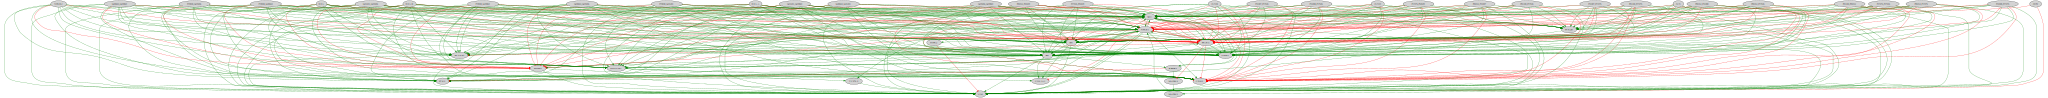

In [17]:
visualizer = NetworkVisualizer(new_net1, color_by='effect')
visualizer.render()

### We can access the network object edges to explore which interactions are in our network

In [18]:
new_net1.edges

,source,target,Type,Effect,References
8080,P12931,Q05397,post_translational,stimulation,Adhesome:10085298;Adhesome:10592173;Adhesome:1...
77863,P12830,P12931,post_translational,stimulation,ACSN:16039586;ACSN:16099633;ACSN:17143292;ACSN...
34553,P12931,P19022,post_translational,inhibition,ACSN:15782139;ACSN:16371504;ACSN:16492141;ACSN...
5786,P12931,Q14289,post_translational,stimulation,Adhesome:10329689;Adhesome:10521452;Adhesome:1...
106165,P02452,P12931,post_translational,stimulation,NaN
...,...,...,...,...,...
147629,COMPLEX:Q00653,P37231,transcriptional,inhibition,CollecTRI:12732648;CollecTRI:14646597
147632,COMPLEX:Q00653_Q04864,P37231,transcriptional,inhibition,CollecTRI:12732648;CollecTRI:14646597
147626,COMPLEX:Q01201_Q04206,P37231,transcriptional,inhibition,CollecTRI:12732648;CollecTRI:14646597
140178,COMPLEX:P05412_P15408,P37231,transcriptional,inhibition,CollecTRI:11124825;CollecTRI:24464219


### Finally we can export the network in bnet format with some basic logical equations

In [7]:
from neko._outputs.exports import Exports

In [8]:
export = Exports(new_net1)

In [9]:
export.export_bnet()
export.export_sif()

The network has some undefined interaction that will be ignored. WARNING: this can result ina disconnected model! 
['SET']


# TO DO:

- method to print sif file with reference for each interaction (easy task)
- more utility functions (???)

In [10]:
%%time
new_net1.connect_genes_to_phenotype(id_accession="GO:0097194", phenotype="execution phase of apoptosis", only_signed=True, compress=True, maxlen=1)

Start requesting genes from Gene Ontology
Fetching from:  https://golr-aux.geneontology.io/solr/select?defType=edismax&qt=standard&indent=on&wt=csv&rows=100000&start=0&fl=bioentity_label&facet=true&facet.mincount=1&facet.sort=count&json.nl=arrarr&facet.limit=25&hl=true&hl.simple.pre=%3Cem%20class=%22hilite%22%3E&hl.snippets=1000&csv.encapsulator=&csv.separator=%09&csv.header=false&csv.mv.separator=%7C&fq=document_category:%22annotation%22&fq=isa_partof_closure:%22GO:0097194%22&fq=taxon_subset_closure_label:%22Homo%20sapiens%22&fq=type:%22protein%22&fq=annotation_class_label:%22execution%20phase%20of%20apoptosis%22&facet.field=aspect&facet.field=taxon_subset_closure_label&facet.field=type&facet.field=evidence_subset_closure_label&facet.field=regulates_closure_label&facet.field=isa_partof_closure_label&facet.field=annotation_class_label&facet.field=qualifier&facet.field=annotation_extension_class_closure_label&facet.field=assigned_by&facet.field=panther_family_label&q=*:*
Done
Starting c

In [8]:
new_net1.edges

,source,target,Type,Effect,References
2047,Q01105,P15531,None,inhibition,HPRD:12628186;SIGNOR:12628186;SPIKE:19254476;S...
4791,P63000,Q01105,None,stimulation,HPRD:17245428;IntAct:17245428;IntAct:23195690;...
5733,P48736,P63000,None,stimulation,SignaLink3:15009099;SignaLink3:23331499
6588,P30530,P48736,None,stimulation,SignaLink3:12470648;SignaLink3:23331499
448,P01106,P15531,None,stimulation,SPIKE:11960382;SPIKE:17093053;SPIKE_LC:1196038...
8877,O60674,P01106,None,stimulation,SIGNOR:12370803
5459,O15524,O60674,None,stimulation,BioGRID:10455112;BioGRID:11713228;BioGRID:1197...
6589,P30530,O15524,None,stimulation,HPRD:12470648;SignaLink3:12470648;SignaLink3:2...
3868,P03372,P15531,None,stimulation,SPIKE:11085516;SPIKE_LC:11085516
66658,P12931,P03372,None,stimulation,BioGRID:15784253;HPRD-phos:7539106;HPRD:127362...
